
# 🧪 ĐỀ THI GIỮA KỲ — KHẢO SÁT DỮ LIỆU CHIM CÁNH CỤT (PENGUINS)
**Họ và tên:** ___ ; **MSSV:** ___ ; **Số máy:** ___

Dữ liệu: `penguins.csv` — số đo 3 loài chim cánh cụt trên 3 đảo (Biscoe, Dream, Torgersen).
Thời gian gợi ý: 75 phút. Được dùng tài liệu.


## 1) Đọc dữ liệu và hiển thị 10 dòng đầu tiên (1đ)

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Phải kiểm tra lại chính xác đường dẫn ( đường dẫn tuyệt đối)
df = pd.read_csv("/Users/trangnguyen/Downloads/HKI_4/GK_TKMT/ôn_thi_KT/data/penguins.csv")
display(df.head(10))
print("Kích thước:", df.shape)


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


Kích thước: (344, 9)



## 2) Tìm hiểu thông tin dữ liệu (5đ)
a) Số lượng chim của mỗi loài.  
b) Số lượng mỗi loài trên mỗi đảo.  
c) Với mỗi loài, so sánh **mean/median/std** cho các cột: 
`bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g`.  
d) Rút ra nhận xét.


In [5]:

# 2a a. Số lượng chim cánh cụt mỗi loài
species_counts = df["species"].value_counts(dropna=False)
species_counts


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [24]:

# 2b Số lượng mỗi loài chim cánh cụt trên đảo
table_species_island = pd.crosstab(df["island"], df["species"], dropna=False)
table_species_island


species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


Với mỗi loại chim cánh cụt, bạn hãy so sánh các đại lượng thống kê: 
giá trị trung bình, trung vị, 

độ lệch chuẩn trên các thuộc tính độ dài mỏ (bill_leghth_mm), 

độ sâu mỏ (bill_depth_mm), 

độ dài cánh (flipper) và trọng lượng (body_mass).



In [25]:

# 2c Với mỗi loài, so sánh mean/median/std cho các cột: bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g.
cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
stats = df.groupby("species")[cols].agg(["mean","median","std"])
stats


bill_length_mm                  bill_depth_mm                   \
                    mean median       std          mean median       std   
species                                                                    
Adelie         38.791391  38.80  2.663405     18.346358  18.40  1.216650   
Chinstrap      48.833824  49.55  3.339256     18.420588  18.45  1.135395   
Gentoo         47.504878  47.30  3.081857     14.982114  15.00  0.981220   

          flipper_length_mm                   body_mass_g                      
                       mean median       std         mean  median         std  
species                                                                        
Adelie           189.953642  190.0  6.539457  3700.662252  3700.0  458.566126  
Chinstrap        195.823529  196.0  7.131894  3733.088235  3700.0  384.335081  
Gentoo           217.186992  216.0  6.484976  5076.016260  5000.0  504.116237

**2d) Nhận xét:**
+ Gentoo là loài lớn nhất với mỏ dài và trọng lượng nặng, trong khi Adelie là loài nhỏ nhất.
+ Sự khác biệt về độ sâu mỏ giữa Gentoo và hai loài còn lại có thể phản ánh sự khác biệt về cấu trúc mỏ liên quan đến chức năng sinh học.
+ Gentoo có sự biến thiên trọng lượng lớn nhất, cho thấy sự đa dạng trong loài này.



## 3) Phân phối của ba loài (2đ)
Chọn biến đại diện (gợi ý: `body_mass_g`) và vẽ histogram cho từng loài. Nêu bình luận.


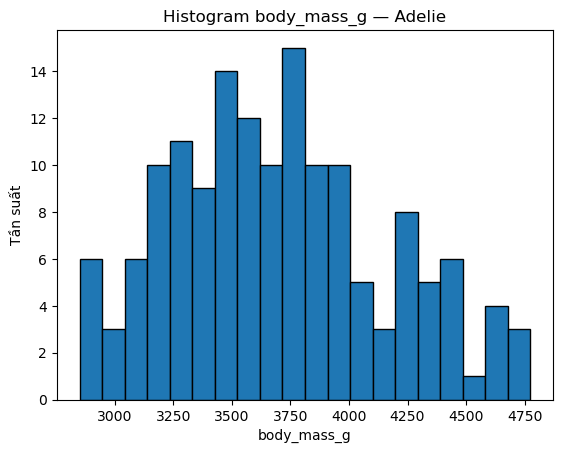

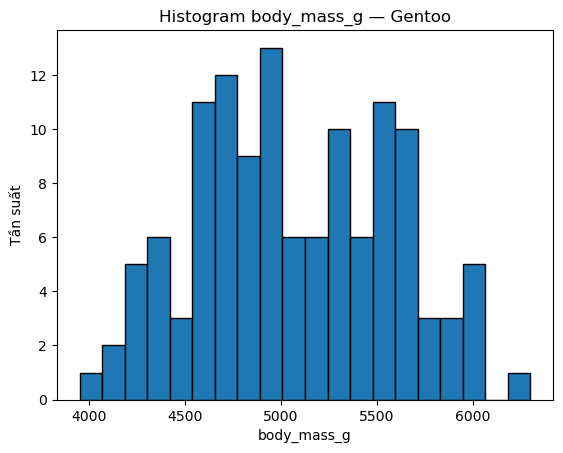

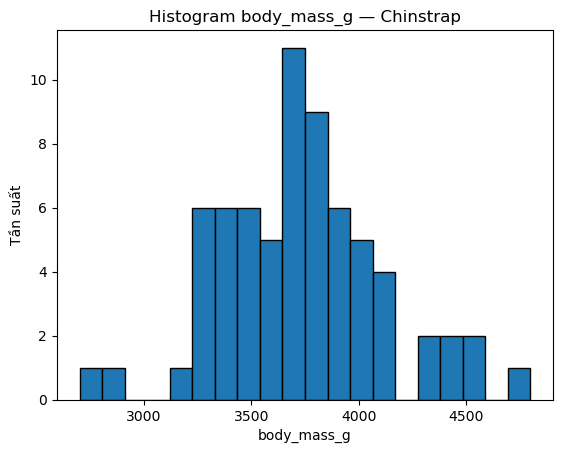

In [9]:

for sp in df["species"].dropna().unique():
    sub = df[df["species"]==sp]["body_mass_g"].dropna()
    plt.figure()
    plt.hist(sub, bins=20, edgecolor = 'black')
    plt.title(f"Histogram body_mass_g — {sp}")
    plt.xlabel("body_mass_g"); plt.ylabel("Tần suất")
    plt.show()



## 4) Quan hệ giữa độ dài cánh và trọng lượng — loài Gentoo (2đ)
a) Vẽ biểu đồ phù hợp và cho biết hai đại lượng có quan hệ không.  
b) Gợi ý thêm thuộc tính có thể ảnh hưởng đến trọng lượng Gentoo.


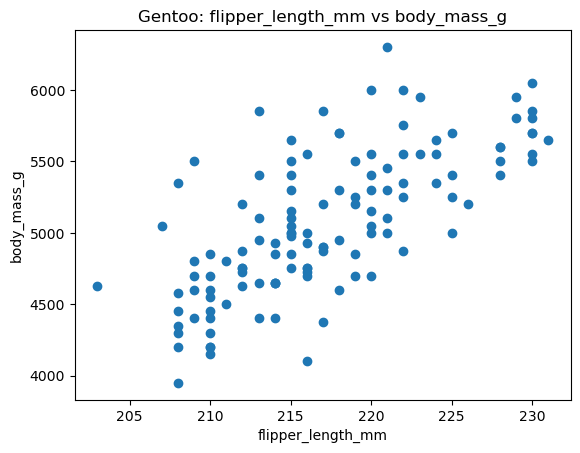

Tương quan Pearson: 0.703


In [10]:

gentoo = df[df["species"]=="Gentoo"].dropna(subset=["flipper_length_mm","body_mass_g"])
plt.figure()
plt.scatter(gentoo["flipper_length_mm"], gentoo["body_mass_g"])
plt.title("Gentoo: flipper_length_mm vs body_mass_g")
plt.xlabel("flipper_length_mm"); plt.ylabel("body_mass_g")
plt.show()

corr = gentoo["flipper_length_mm"].corr(gentoo["body_mass_g"])
print("Tương quan Pearson:", round(corr, 3))


=======================================================================================================================

3. (2 điểm) Vẽ đồ thị phù hợp thể hiện phân phối của ba loại chim cánh cụt, qua đó bạn hãy đưa ra bình luận của mình.


In [27]:
# Chọn các cột cần thiết
penguins_filtered = df[['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Loại bỏ các hàng có giá trị thiếu
penguins_filtered = penguins_filtered.dropna()

# Xem dữ liệu đã qua xử lý
penguins_filtered

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0
340,Chinstrap,43.5,18.1,202.0,3400.0
341,Chinstrap,49.6,18.2,193.0,3775.0
342,Chinstrap,50.8,19.0,210.0,4100.0


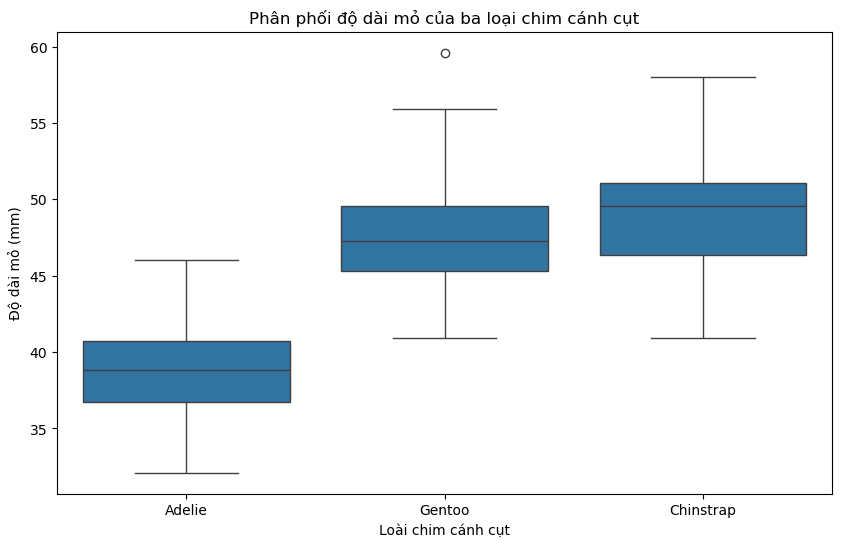

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Vẽ boxplot cho độ dài mỏ
sns.boxplot(x='species', y='bill_length_mm', data=penguins_filtered)

plt.title('Phân phối độ dài mỏ của ba loại chim cánh cụt')
plt.xlabel('Loài chim cánh cụt')
plt.ylabel('Độ dài mỏ (mm)')
plt.show()

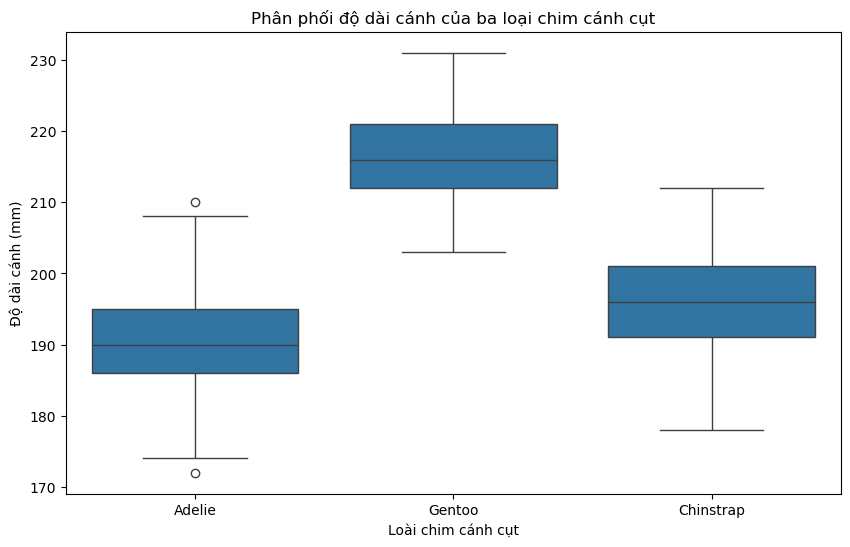

In [30]:
plt.figure(figsize=(10, 6))

# Vẽ boxplot cho độ dài cánh
sns.boxplot(x='species', y='flipper_length_mm', data=penguins_filtered)

plt.title('Phân phối độ dài cánh của ba loại chim cánh cụt')
plt.xlabel('Loài chim cánh cụt')
plt.ylabel('Độ dài cánh (mm)')
plt.show()

=======================================================================================================================

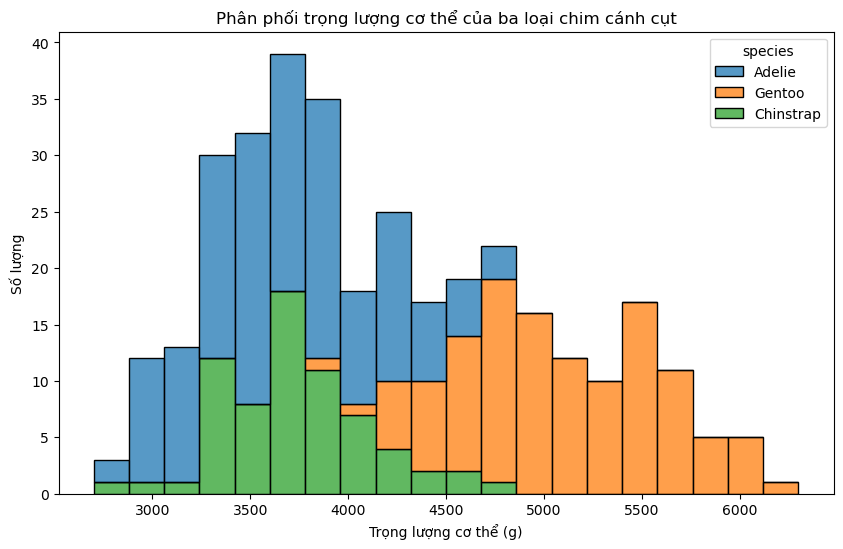

In [31]:
plt.figure(figsize=(10, 6))

# Vẽ histogram cho trọng lượng cơ thể
sns.histplot(data=penguins_filtered, x='body_mass_g', hue='species', multiple='stack', bins=20)

plt.title('Phân phối trọng lượng cơ thể của ba loại chim cánh cụt')
plt.xlabel('Trọng lượng cơ thể (g)')
plt.ylabel('Số lượng')
plt.show()

4.	(2 điểm) Chọn loại đồ thị phù hợp để khảo sát mối quan hệ giữa độ dài cánh và trọng lượng của loài chim cánh cụt Gentoo:
+ a.	Theo bạn hai đại lượng này có quan hệ với nhau hay không? Giải thích.
+ b.	Ngoài độ dài cánh, theo bạn còn thuộc tính nào có khả năng ảnh hưởng đến trọng lượng của loài chim Gentoo?


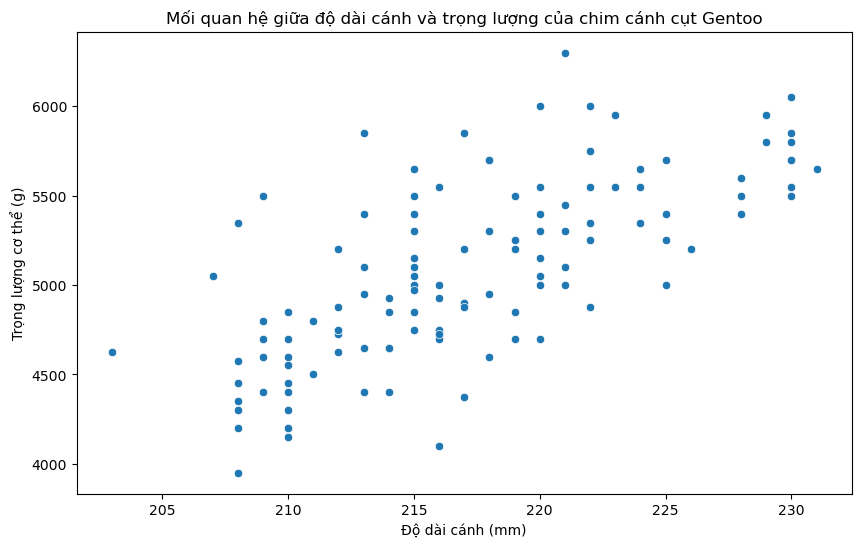

In [32]:
# Lọc dữ liệu cho loài Gentoo
gentoo_data = penguins_filtered[penguins_filtered['species'] == 'Gentoo']

plt.figure(figsize=(10, 6))

# Vẽ scatter plot cho độ dài cánh và trọng lượng
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=gentoo_data)

plt.title('Mối quan hệ giữa độ dài cánh và trọng lượng của chim cánh cụt Gentoo')
plt.xlabel('Độ dài cánh (mm)')
plt.ylabel('Trọng lượng cơ thể (g)')
plt.show()

### a. Mối quan hệ giữa độ dài cánh và trọng lượng

Sau khi vẽ biểu đồ scatter plot cho độ dài cánh và trọng lượng của loài chim cánh cụt Gentoo, chúng ta có thể quan sát được mối quan hệ giữa hai đại lượng này. 

- **Quan sát**: Biểu đồ cho thấy có xu hướng tăng, nghĩa là khi độ dài cánh tăng thì trọng lượng cơ thể cũng có xu hướng tăng.
- **Giải thích**: Điều này có thể được lý giải bởi vì các cá thể lớn hơn thường có cánh lớn hơn để hỗ trợ trong việc bay hoặc di chuyển trong môi trường sống của chúng. Sự tương quan này cho thấy rằng độ dài cánh có thể là một yếu tố quan trọng trong việc đánh giá trọng lượng cơ thể của chim cánh cụt Gentoo.

### b. Các thuộc tính khác ảnh hưởng đến trọng lượng

Ngoài độ dài cánh, còn một số thuộc tính khác có thể ảnh hưởng đến trọng lượng của loài chim cánh cụt Gentoo, bao gồm:

1. **Độ dài mỏ (`bill_length_mm`)**: Độ dài mỏ có thể liên quan đến cách thức kiếm ăn và dinh dưỡng, điều này có thể ảnh hưởng đến sức khỏe và trọng lượng của chim.
2. **Độ sâu mỏ (`bill_depth_mm`)**: Tương tự như độ dài mỏ, độ sâu mỏ cũng có thể ảnh hưởng đến khả năng kiếm ăn.
3. **Tuổi tác**: Tuổi của chim có thể ảnh hưởng đến trọng lượng, vì chim trưởng thành thường nặng hơn so với chim non.
4. **Giới tính**: Giới tính có thể là một yếu tố, vì thường thì chim cái và chim đực có trọng lượng khác nhau.
5. **Chế độ ăn uống**: Sự sẵn có của thực phẩm và chế độ ăn uống cũng có thể ảnh hưởng đến trọng lượng cơ thể.

Bằng cách khảo sát mối quan hệ giữa các thuộc tính này, chúng ta có thể có cái nhìn tổng thể hơn về các yếu tố ảnh hưởng đến trọng lượng của loài chim cánh cụt Gentoo.


---
# PHẦN BỔ SUNG — EDA mở rộng (áp dụng cho Penguins)


### B1) 5 dòng đầu và 10 dòng cuối (1đ)

In [15]:
#hiển thị 5 dòng đầu
display(df.head(5))


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [16]:
#hiển thị 10 dòng cuối
display(df.tail(10))

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
334,335,Chinstrap,Dream,50.2,18.8,202.0,3800.0,male,2009
335,336,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female,2009
336,337,Chinstrap,Dream,51.9,19.5,206.0,3950.0,male,2009
337,338,Chinstrap,Dream,46.8,16.5,189.0,3650.0,female,2009
338,339,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female,2009
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


### B2) Thuộc tính định tính vs định lượng (1đ)

In [17]:

qual_cols = df.select_dtypes(include= ["object", 'category']).columns.tolist()
quant_cols = df.select_dtypes(include=["number"]).columns.tolist()
print("Định tính:", qual_cols)
print("Định lượng:", quant_cols)


Định tính: ['species', 'island', 'sex']
Định lượng: ['rowid', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']


### B3) Thiếu dữ liệu & trùng lặp → xoá và kiểm tra lại (2đ)

In [18]:

print("Thiếu dữ liệu ban đầu:\n", df.isna().sum())
print("Số dòng trùng lặp ban đầu:", df.duplicated().sum())

df_clean = df.dropna(subset=["species","island","bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]).drop_duplicates()

print("\nSau xử lý:")
print("Thiếu dữ liệu (df_clean):\n", df_clean.isna().sum())
print("Trùng lặp (df_clean):", df_clean.duplicated().sum())
print("Kích thước mới:", df_clean.shape)


Thiếu dữ liệu ban đầu:
 rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
Số dòng trùng lặp ban đầu: 0

Sau xử lý:
Thiếu dữ liệu (df_clean):
 rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
year                 0
dtype: int64
Trùng lặp (df_clean): 0
Kích thước mới: (342, 9)


### B4) Đặc trưng định lượng (1đ)

In [19]:

desc = df_clean.select_dtypes(include=["number"]).agg(["mean","median","std","min","max"]).T
desc


,mean,median,std,min,max
rowid,172.701754,172.50,99.174948,1.0,344.0
bill_length_mm,43.921930,44.45,5.459584,32.1,59.6
bill_depth_mm,17.151170,17.30,1.974793,13.1,21.5
flipper_length_mm,200.915205,197.00,14.061714,172.0,231.0
body_mass_g,4201.754386,4050.00,801.954536,2700.0,6300.0
year,2008.029240,2008.00,0.817168,2007.0,2009.0



### B5) Boxplot và outlier (1đ)  
Trong Penguins không có `Price`; thay bằng `body_mass_g` và dùng IQR để xác định outlier.


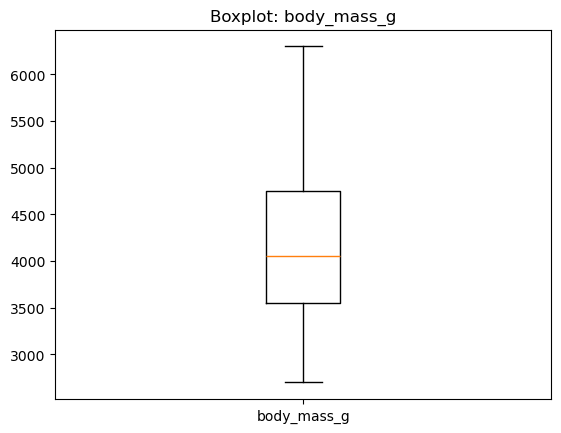

Ngưỡng outlier: < 1750.0 hoặc > 6550.0
Số outlier: 0


In [21]:
col = "body_mass_g"
vals = df_clean[col].dropna()

plt.figure()
# <<< ĐÃ SỬA LỖI CẢNH BÁO >>>
plt.boxplot(vals, vert=True, tick_labels=[col]) 
plt.title(f"Boxplot: {col}")
plt.show()

Q1 = vals.quantile(0.25); Q3 = vals.quantile(0.75)
IQR = Q3 - Q1
low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outliers = vals[(vals < low) | (vals > high)]
print(f"Ngưỡng outlier: < {low:.1f} hoặc > {high:.1f}")
print("Số outlier:", outliers.shape[0])

In [22]:
# --- CÂU 1: Tính tỷ lệ chim đực và cái trong toàn bộ dữ liệu
sex_ratio = df['sex'].value_counts(normalize=True) * 100
print("Tỷ lệ giới tính (%):")
print(sex_ratio)

# --- CÂU 2: Tính tỷ lệ từng loài chim (Adelie, Gentoo, Chinstrap)
species_ratio = df['species'].value_counts(normalize=True) * 100
print("\nTỷ lệ các loài (%):")
print(species_ratio)

# --- CÂU 3: Trung bình, trung vị, độ lệch chuẩn của độ dài mỏ
bill_stats = df['bill_length_mm'].agg(['mean','median','std'])
print("\nĐặc trưng thống kê của bill_length_mm:")
print(bill_stats)

# --- CÂU 4: Trung bình trọng lượng theo giới tính
avg_by_sex = df.groupby('sex')['body_mass_g'].mean()
print("\nTrọng lượng trung bình theo giới tính:")
print(avg_by_sex)

# --- CÂU 5: Trung bình trọng lượng theo từng loài
avg_by_species = df.groupby('species')['body_mass_g'].mean()
print("\nTrọng lượng trung bình theo từng loài:")
print(avg_by_species)

# --- CÂU 6: Trung bình độ dài cánh theo từng đảo
avg_flipper_by_island = df.groupby('island')['flipper_length_mm'].mean()
print("\nTrung bình độ dài cánh (flipper_length_mm) theo từng đảo:")
print(avg_flipper_by_island)

# --- CÂU 7: So sánh trung bình độ dài cánh giữa chim đực và cái
flipper_compare = df.groupby('sex')['flipper_length_mm'].agg(['mean','median','std','count'])
print("\nSo sánh độ dài cánh giữa các giới tính:")
print(flipper_compare)

# --- CÂU 8: Tỷ lệ chim có trọng lượng trên 5000g
ratio_over_5000 = (df['body_mass_g'] > 5000).mean() * 100
print(f"\nTỷ lệ chim có trọng lượng > 5000g: {ratio_over_5000:.2f}%")

# --- CÂU 9: Tính hệ số tương quan giữa các biến định lượng
numeric_cols = df.select_dtypes(include='number')
corr = numeric_cols.corr()
print("\nMa trận tương quan:")
print(corr)


Tỷ lệ giới tính (%):
sex
male      50.45045
female    49.54955
Name: proportion, dtype: float64

Tỷ lệ các loài (%):
species
Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: proportion, dtype: float64

Đặc trưng thống kê của bill_length_mm:
mean      43.921930
median    44.450000
std        5.459584
Name: bill_length_mm, dtype: float64

Trọng lượng trung bình theo giới tính:
sex
female    3862.272727
male      4545.684524
Name: body_mass_g, dtype: float64

Trọng lượng trung bình theo từng loài:
species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

Trung bình độ dài cánh (flipper_length_mm) theo từng đảo:
island
Biscoe       209.706587
Dream        193.072581
Torgersen    191.196078
Name: flipper_length_mm, dtype: float64

So sánh độ dài cánh giữa các giới tính:
              mean  median        std  count
sex                                         
female  197.363636   193.0  12.500776    165
mal

In [23]:
# 1. So sánh tỷ lệ giới tính (Nam vs Nữ)
sex_counts = df['sex'].value_counts(normalize=True) * 100
print("Tỷ lệ giới tính (%):")
print(sex_counts)

if sex_counts.iloc[0] > sex_counts.iloc[1]:
    print(f"👉 {sex_counts.index[0]} chiếm tỷ lệ cao hơn ({sex_counts.iloc[0]:.1f}% > {sex_counts.iloc[1]:.1f}%)")
elif sex_counts.iloc[0] < sex_counts.iloc[1]:
    print(f"👉 {sex_counts.index[1]} chiếm tỷ lệ cao hơn ({sex_counts.iloc[1]:.1f}% > {sex_counts.iloc[0]:.1f}%)")
else:
    print("👉 Hai giới tính có tỷ lệ bằng nhau.")


Tỷ lệ giới tính (%):
sex
male      50.45045
female    49.54955
Name: proportion, dtype: float64
👉 male chiếm tỷ lệ cao hơn (50.5% > 49.5%)


In [28]:
# 🔧 Tiền xử lý an toàn cho `sex` (tránh NaN khi so sánh)
if 'sex' in df.columns:
    df['sex'] = df['sex'].astype(str).str.strip().str.upper()
    # Giữ lại chỉ MALE/FEMALE
    df = df[df['sex'].isin(['MALE','FEMALE'])]
    print('Chuẩn hóa cột sex xong. Phân bố:')
    print(df['sex'].value_counts())


Chuẩn hóa cột sex xong. Phân bố:
sex
MALE      168
FEMALE    165
Name: count, dtype: int64


In [29]:
# So sánh trọng lượng trung bình giữa chim đực và cái
mean_male = df.loc[df['sex']=='MALE', 'body_mass_g'].mean()
mean_female = df.loc[df['sex']=='FEMALE', 'body_mass_g'].mean()

print(f"Trọng lượng TB chim đực: {mean_male:.2f} g")
print(f"Trọng lượng TB chim cái: {mean_female:.2f} g")

if mean_male > mean_female:
    print("👉 Chim đực nặng hơn trung bình so với chim cái.")
elif mean_male < mean_female:
    print("👉 Chim cái nặng hơn trung bình so với chim đực.")
else:
    print("👉 Trọng lượng trung bình của hai giới tính bằng nhau.")


Trọng lượng TB chim đực: 4545.68 g
Trọng lượng TB chim cái: 3862.27 g
👉 Chim đực nặng hơn trung bình so với chim cái.


## B) Xác suất & Phân vị — điền số theo ngữ cảnh đề
- **Nhị thức**: `binom.pmf/cdf/ppf`
- **Poisson**: `poisson.pmf/cdf/ppf`
- **Chuẩn**: `norm.cdf/ppf`

In [2]:
from scipy.stats import binom, poisson, norm
# Binomial — TODO: điền n, p, k phù hợp ngữ cảnh
n, p, k = 10, 0.3, 3
print('[Binomial] P(X=k)=', binom.pmf(k,n,p), '  P(X<=k)=', binom.cdf(k,n,p), '  k_90=', binom.ppf(0.90,n,p))

# Poisson — TODO: điền λ phù hợp
lam = 6
print('[Poisson] P(X<=2)=', poisson.cdf(2,lam), '  P(X>=3)=', 1-poisson.cdf(2,lam), '  x_95%=', poisson.ppf(0.95,lam))

# Normal — TODO: điền μ, σ
mu, sigma = 100, 15
print('[Normal] P(X<120)=', norm.cdf(120,mu,sigma), '  P(85<X<115)=', norm.cdf(115,mu,sigma)-norm.cdf(85,mu,sigma), '  x_90%=', norm.ppf(0.90,mu,sigma))


[Binomial] P(X=k)= 0.2668279319999998   P(X<=k)= 0.6496107184000002   k_90= 5.0
[Poisson] P(X<=2)= 0.061968804416658946   P(X>=3)= 0.938031195583341   x_95%= 10.0
[Normal] P(X<120)= 0.9087887802741321   P(85<X<115)= 0.6826894921370859   x_90%= 119.22327348316901


## C.1 Nhị thức (Binomial)

Ngữ cảnh mẫu: “Trong một mẫu n cá thể, xác suất một cá thể có tính chất A là p. Tính P(X = k), P(X ≤ k), phân vị 90%…”

Công cụ: binom.pmf (xác suất đúng k), binom.cdf (tích lũy), binom.ppf (phân vị).

In [3]:
from scipy.stats import binom

# TODO: điền tham số theo đề
n = 20      # cỡ mẫu
p = 0.35    # xác suất thành công của 1 cá thể
k = 7       # số thành công quan tâm

print("Binomial(n, p)")
print("P(X = k)   =", binom.pmf(k, n, p))
print("P(X <= k)  =", binom.cdf(k, n, p))
print("P(X >= k)  =", 1 - binom.cdf(k-1, n, p))
print("Phân vị 90% (k sao cho P(X <= k) >= 0.90):", binom.ppf(0.90, n, p))


Binomial(n, p)
P(X = k)   = 0.18440118638393138
P(X <= k)  = 0.6010266046031639
P(X >= k)  = 0.5833745817807674
Phân vị 90% (k sao cho P(X <= k) >= 0.90): 10.0


In [12]:
# Ví dụ: A = "chim có body_mass_g > 5000"
p_hat = (df['body_mass_g'] > 5000).mean()
n = 30; k = 10
print("Dùng p̂ từ dữ liệu:", p_hat)
print("P(X = k) với p̂   =", binom.pmf(k, n, p_hat))


Dùng p̂ từ dữ liệu: 0.17732558139534885
P(X = k) với p̂   = 0.018622852719280412


Ghi nhớ: Nếu đề yêu cầu xấp xỉ chuẩn cho Nhị thức, dùng z với
μ = n p và σ = √(n p (1-p)), kèm continuity correction (dịch 0.5).

## C.2 Poisson

- Ngữ cảnh mẫu: “Số sự kiện hiếm trong một khoảng thời gian/khu vực, trung bình λ.”

- Công cụ: poisson.pmf, poisson.cdf, poisson.ppf.

In [13]:
from scipy.stats import poisson

# TODO: điền λ theo đề
lam = 6   # số kỳ vọng (trung bình) trong khoảng quan sát

print("Poisson(λ)")
print("P(X = 2)   =", poisson.pmf(2, lam))
print("P(X <= 2)  =", poisson.cdf(2, lam))
print("P(X >= 3)  =", 1 - poisson.cdf(2, lam))
print("Phân vị 95%:", poisson.ppf(0.95, lam))


Poisson(λ)
P(X = 2)   = 0.04461753917999444
P(X <= 2)  = 0.061968804416658946
P(X >= 3)  = 0.938031195583341
Phân vị 95%: 10.0


Mẹo: Khi λ lớn (≈≥10), Poisson có thể xấp xỉ chuẩn với μ=λ, σ=√λ.

## C.3 Chuẩn (Normal)

- Ngữ cảnh mẫu: “X ~ N(μ, σ). Tính P(X < a), P(a < X < b), phân vị q%…”

- Công cụ: norm.cdf, norm.ppf.

In [14]:
from scipy.stats import norm

# TODO: điền μ, σ theo đề
mu = 4000     # trung bình
sigma = 350   # độ lệch chuẩn

# ví dụ câu hỏi
a, b = 4200, 4500

print("Normal(μ, σ)")
print("P(X < a)        =", norm.cdf(a, mu, sigma))
print("P(a < X < b)    =", norm.cdf(b, mu, sigma) - norm.cdf(a, mu, sigma))
print("Phân vị 90%     =", norm.ppf(0.90, mu, sigma))


Normal(μ, σ)
P(X < a)        = 0.7161454169013237
P(a < X < b)    = 0.20729085758884158
Phân vị 90%     = 4448.54304794061


In [15]:
# Ví dụ lấy X = body_mass_g (nếu giả định ~ chuẩn trong một loài, như Gentoo)
gentoo_mass = df.loc[df['species']=='Gentoo', 'body_mass_g'].dropna()
mu_hat  = gentoo_mass.mean()
sd_hat  = gentoo_mass.std(ddof=1)

print("Ước lượng từ Gentoo: μ̂ =", round(mu_hat,1), "  σ̂ =", round(sd_hat,1))
print("P(X < 5000) ~", norm.cdf(5000, mu_hat, sd_hat))


Ước lượng từ Gentoo: μ̂ = 5076.0   σ̂ = 504.1
P(X < 5000) ~ 0.44007023925337657


## C.4 Khoảng tin cậy 90% cho tỉ lệ (dạng hay gặp trong đề)

**Dùng z = 1.645 cho 90% CI.**

- alpha = ( 100 - C )%
- alpha/2 = ( 100 - C )/200
- Z của alpha/2 = 1 - alpha/2:  tính bằng công thức bên dưới: 
  => mode 7 -> 3 điền vùng 1 - alpha /2 =>  điền vùng là 1 - alpha/2
  
   =>  chỉ áp dụng khi tính z
  

In [17]:
# TODO: điền x, n
x = 18     # số thành công quan sát
n = 50     # cỡ mẫu
p_hat = x / n
z = 1.645
se = (p_hat * (1 - p_hat) / n) ** 0.5

lo, hi = p_hat - z*se, p_hat + z*se
print(f"CI 90% cho p: p̂={p_hat:.3f} -> ({lo:.3f}, {hi:.3f})")


CI 90% cho p: p̂=0.360 -> (0.248, 0.472)


## C.5 Một mẫu mô phỏng “kiểu thi” để bạn thử nhanh

Giả sử đề hỏi:

“Một con Gentoo bất kỳ nặng > 5000 g có xác suất bao nhiêu?” (Normal)

“Trong 20 con được chọn, có ≥ 8 con nặng > 5000 g?” (Binomial, dùng p̂)

“Trung bình số ‘sự kiện hiếm’ λ=2.5; xác suất ≥ 4?” (Poisson)

In [18]:
from scipy.stats import binom, poisson, norm

# 1) Normal với Gentoo
gentoo = df[df['species']=='Gentoo']['body_mass_g'].dropna()
mu_g, sd_g = gentoo.mean(), gentoo.std(ddof=1)
print("Gentoo ~ N(mu, sigma) ≈", round(mu_g,1), round(sd_g,1))
print("P(Gentoo mass > 5000) ≈", 1 - norm.cdf(5000, mu_g, sd_g))

# 2) Binomial với p̂ từ dữ liệu
p_hat = (gentoo > 5000).mean()
n, k = 20, 8
print(f"p̂ (Gentoo >5000) = {p_hat:.3f}")
print("P(X >= 8) =", 1 - binom.cdf(k-1, n, p_hat))

# 3) Poisson
lam = 2.5
print("P_Poisson(X >= 4) =", 1 - poisson.cdf(3, lam))


Gentoo ~ N(mu, sigma) ≈ 5076.0 504.1
P(Gentoo mass > 5000) ≈ 0.5599297607466234
p̂ (Gentoo >5000) = 0.496
P(X >= 8) = 0.8604390980578158
P_Poisson(X >= 4) = 0.24242386686693385
